In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import scipy.stats as stats


In [2]:
df=pd.read_csv("Resources/VITA-MINE.csv")
df.tail(3)

,RA_Report #,Year/Month,Year,PRI_Reported Brand/Product Name,Type,Brand/Product,CI_Gender,CI_Age at Adverse Event,AEC_One Row Outcomes,SYM_One Row Coded Symptoms,Outcome,Severity
35237,214407,2017-06,2017,OCUVITE EYE + MULTI (OCUVITE MULTIVITAMIN) (TA...,OCUVITE EYE + MULTI (OCUVITE MULTIVITAMIN) (TA...,NaN,Female,92.0,"OTHER SERIOUS (IMPORTANT MEDICAL EVENTS), HOSP...","DIVERTICULITIS, EYE DISORDER, HAEMORRHAGE, OCU...",HOSPITALIZATION,3
35238,214516,2017-06,2017,CALTRATE CALCIUM,CALCIUM,NaN,Female,66.0,"HOSPITALIZATION, VISITED AN ER",SWELLING,HOSPITALIZATION,3
35239,214516,2017-06,2017,VITAMIN D3,VITAMIN D,NaN,Female,66.0,"HOSPITALIZATION, VISITED AN ER",SWELLING,HOSPITALIZATION,3


In [3]:
#### neal py code

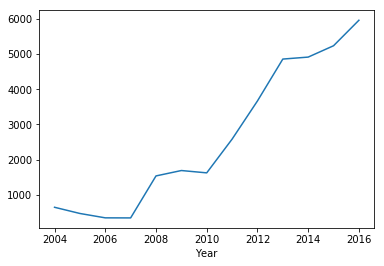

In [4]:
b=df.groupby("Year")["Outcome"].count()
b[:-1].plot()


In [5]:
c=df.groupby("Year/Month")["Outcome"].count()
c2016=c[:-5]
c20161=c[:-7]
df1=pd.DataFrame(c2016)
df1.reset_index(inplace=True)



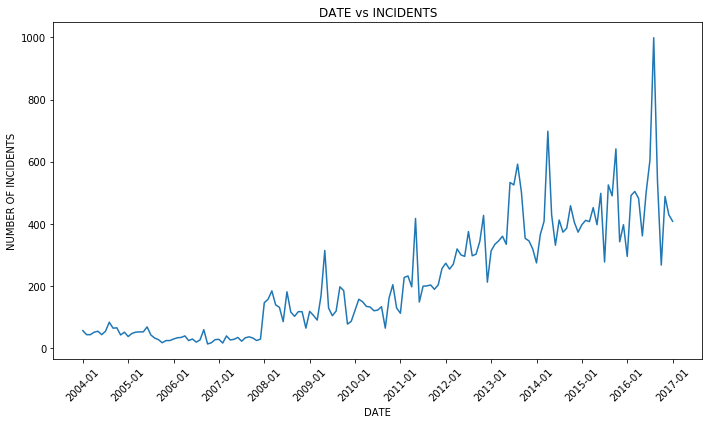

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot_date(df1["Year/Month"], c2016, '-')
plt.xticks(rotation=45)
loc = ticker.MultipleLocator(base=12) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.title("DATE vs INCIDENTS")
plt.ylabel("NUMBER OF INCIDENTS")
plt.xlabel("DATE")
plt.tight_layout()
plt.savefig('Image/DATEvsINCIDENTS.png')
plt.show()

In [7]:
#from graph above, we see that the # of incident vs time follows geometric brownian motion
#so we will use monte carlo method to simulate the # of incident each month for next 10 years
creturn=np.log(1+c2016.pct_change())
u=np.array([creturn.mean()])
stdev=np.array([creturn.std()])
t_interval=120
iteration=100000
drift=u-.5*stdev**2
monthlychange=np.exp(drift+stdev*norm.ppf(np.random.rand(t_interval,iteration)))

In [8]:
Simulation=np.zeros_like(monthlychange)
Simulation[0]=c20161[-1]
for x in range(1,t_interval):
    Simulation[x]=Simulation[x-1]*monthlychange[x]

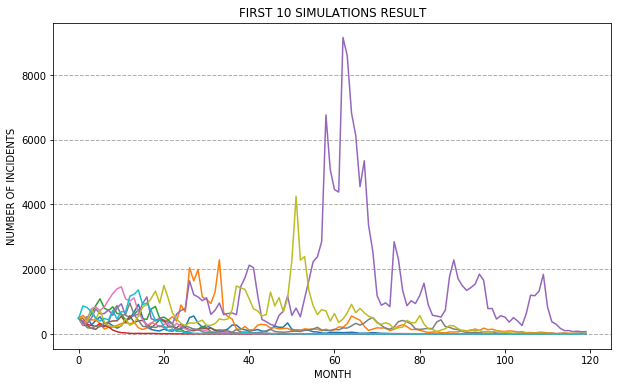

In [40]:
plt.figure(figsize=(10,6))
plt.plot(Simulation[:,:10])
plt.title("FIRST 10 SIMULATIONS RESULT")
plt.ylabel("NUMBER OF INCIDENTS")
plt.xlabel("MONTH")
plt.grid(linestyle='--', linewidth=1, axis="y")
plt.savefig('Image/FIRST10_SIMULATIONS.png')
plt.show()

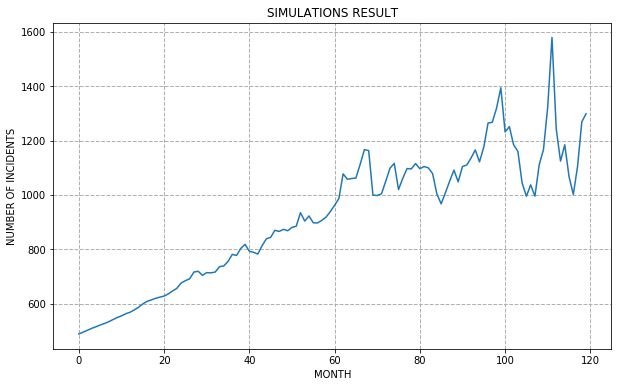

In [42]:
a=[]
for x in range(t_interval):
    a.append(Simulation[x].mean())
plt.figure(figsize=(10,6))
plt.plot(a)
plt.ylabel("NUMBER OF INCIDENTS")
plt.xlabel("MONTH")
plt.title("SIMULATIONS RESULT")
plt.grid(linestyle='--', linewidth=1, axis="both")
plt.savefig('Image/SIMULATION_RESULT.png')
plt.show()


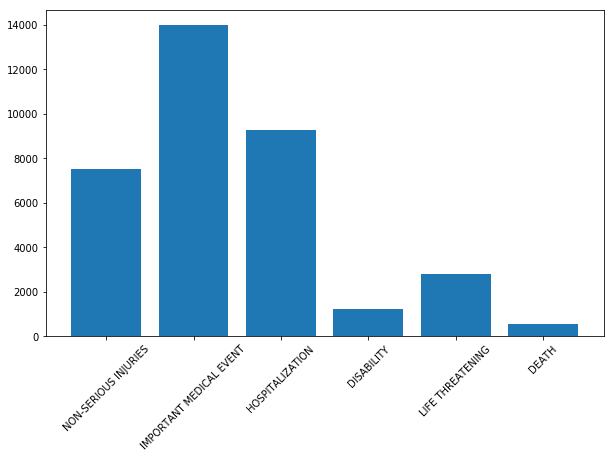

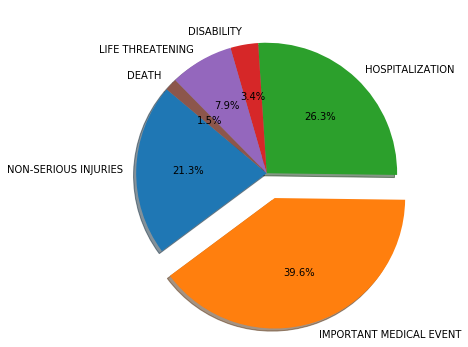

In [11]:
zz=df.groupby("Outcome")["Year"].count()
zz=pd.DataFrame(zz)
zz.reset_index(inplace=True)
zz=zz.reindex([5,3,2,1,4,0])
plt.figure(figsize=(10,6))
plt.bar(zz.Outcome,zz.Year)
exp1=np.zeros(len(zz))
exp1[1]=0.2
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10,6))
plt.pie(zz.Year, explode=exp1, labels=zz.Outcome,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

<BarContainer object of 2 artists>

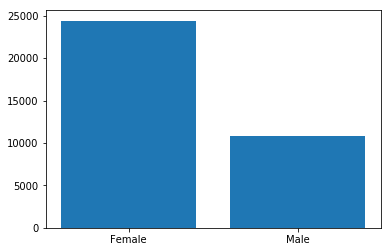

In [12]:
zz1=df.groupby("CI_Gender")["Outcome"].count()
zz1=zz1[:2]
plt.bar(["Female","Male"],zz1)

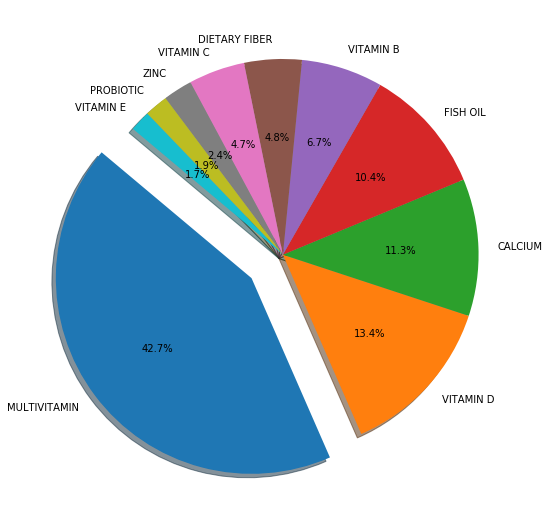

In [13]:
zz2=df.groupby("Type")["Outcome"].count()
zz2=zz2.sort_values(ascending=False)
zz2=zz2[:10]
#top 10 supplement incident
explode=np.zeros(len(zz2))
explode[0]=0.2
plt.figure(figsize=(10,9))
plt.pie(zz2.values, explode=explode, labels=zz2.index,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

In [14]:
dfmalesev=df[df["CI_Gender"]=="Male"]
dfmalesevsamp=dfmalesev["Severity"]
dffemalesev=df[df["CI_Gender"]=="Female"]
dffemalesevsamp=dffemalesev["Severity"]
t_stat, p_val = stats.ttest_ind(dfmalesevsamp.values, dffemalesevsamp.values, equal_var=False)
print("μ(men) is {}.format(dfmalese)")
print(f"p-value is: {p_val}")
print(f"t-test value is: {t_stat}")
print("\nHo:μ(Men Severity)-μ(Women Severity)=0\nHa:μ(Men Severity)-μ(Women Severity)≠0\n")
print(f"P_val = {round(p_val,5)}, thus p < 0.05")
print("Reject Null Hypothese, We conclude that there is significant difference between the mean Severity of men and women")

μ(men) is {}.format(dfmalese)
p-value is: 1.041058484452447e-61
t-test value is: 16.63702383396303

Ho:μ(Men Severity)-μ(Women Severity)=0
Ha:μ(Men Severity)-μ(Women Severity)≠0

P_val = 0.0, thus p < 0.05
Reject Null Hypothese, We conclude that there is significant difference between the mean Severity of men and women


In [15]:
dfn=df.groupby("CI_Gender")["Outcome"].value_counts()
dfn=dfn[:-1]

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

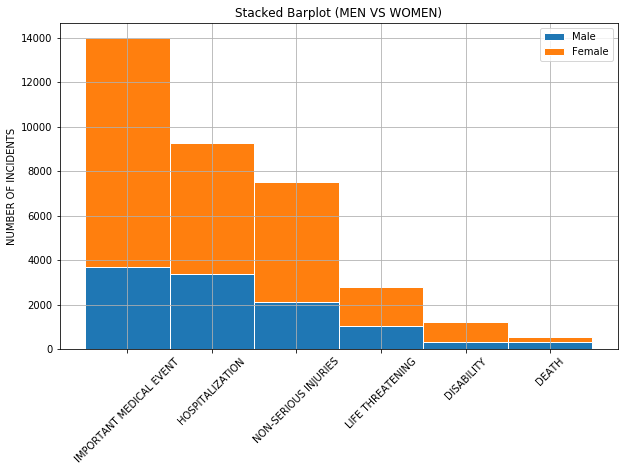

In [16]:
plt.figure(figsize=(10,6))
plt.bar(dfn.loc["Male"].index, dfn.loc["Male"].values,edgecolor="white", width=1)
plt.bar(dfn.loc["Female"].index, dfn.loc["Female"].values, bottom=dfn.loc["Male"].values,edgecolor="white", width=1)
plt.ylabel("NUMBER OF INCIDENTS")
plt.title("Stacked Barplot (MEN VS WOMEN)")
plt.grid()
plt.legend(["Male","Female"],loc="best")
plt.xticks(rotation=45)

In [17]:
bins=[0,3,14,19,46,61,1000]
group_names=["BABY","CHILD","TEENAGER","ADULT","MID-AGED","ELDER"]
df["Age Group"] = pd.cut(df["CI_Age at Adverse Event"], bins, labels=group_names)

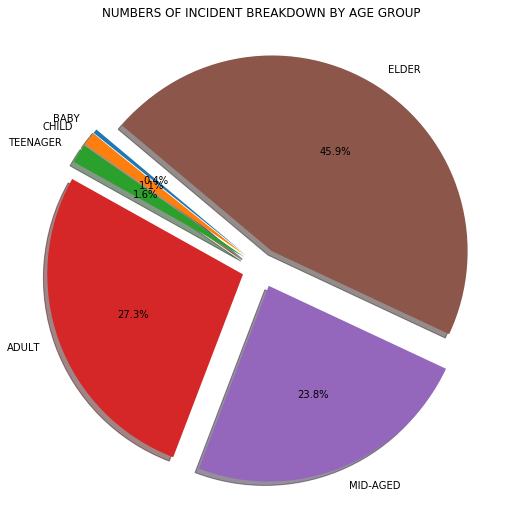

In [18]:
dfage=df.groupby("Age Group")["Outcome"].count()
dfage
explode11=np.zeros(len(dfage))
explode11[:]=0.1
plt.figure(figsize=(10,9))
plt.pie(dfage.values, explode=explode11, labels=dfage.index,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("NUMBERS OF INCIDENT BREAKDOWN BY AGE GROUP")
plt.show()

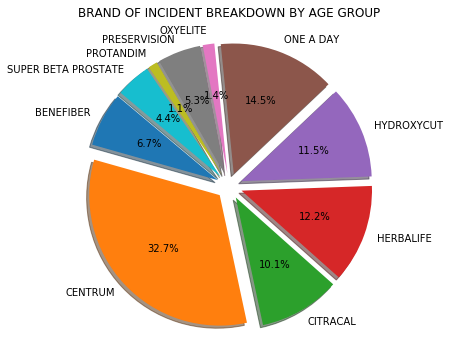

In [19]:
dfprod=df.groupby("Brand/Product")["Outcome"].count()
dfprod
explode111=np.zeros(len(dfprod))
explode111[:]=0.1
plt.figure(figsize=(10,6))
plt.pie(dfprod.values, explode=explode111, labels=dfprod.index,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("BRAND OF INCIDENT BREAKDOWN BY AGE GROUP")
plt.show()

Text(0.5, 1.0, 'Stacked Barplot by Brand/Product')

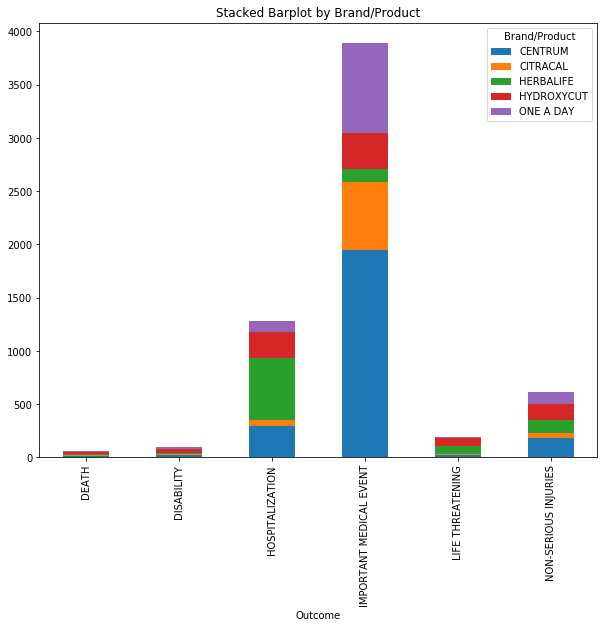

In [44]:
dfprod1=df.groupby(["Brand/Product"])["Outcome"].value_counts()
dfprod1=dfprod1.reset_index(name="Count")
dfprod1=dfprod1.loc[(dfprod1["Brand/Product"]=="CENTRUM")|(dfprod1["Brand/Product"]=="ONE A DAY")|(dfprod1["Brand/Product"]=="HERBALIFE")|(dfprod1["Brand/Product"]=="HYDROXYCUT")|(dfprod1["Brand/Product"]=="CITRACAL")]
dfprod1=dfprod1.pivot(index="Outcome", columns="Brand/Product",values="Count")
dfprod1.plot(kind="bar", stacked=True, figsize=(10,8))
plt.title("Stacked Barplot by Brand/Product")

In [21]:
dfprod2=df.loc[(df["Brand/Product"]=="CENTRUM")|(df["Brand/Product"]=="ONE A DAY")|(df["Brand/Product"]=="HERBALIFE")|(df["Brand/Product"]=="HYDROXYCUT")|(df["Brand/Product"]=="CITRACAL")]
df2222=pd.DataFrame()
df2222=dfprod2.groupby(["Year","Brand/Product"])["Outcome"].count()
df2222=pd.DataFrame(df2222)
df2222.reset_index(inplace=True)
df2221=df2222.pivot(index="Year", columns="Brand/Product",values="Outcome")
df2221=df2221.fillna(0)
df2221[:-1]

Brand/Product,CENTRUM,CITRACAL,HERBALIFE,HYDROXYCUT,ONE A DAY
Year,,,,,
2004,6.0,3.0,9.0,12.0,8.0
2005,6.0,2.0,9.0,2.0,2.0
2006,2.0,0.0,10.0,4.0,2.0
2007,3.0,0.0,33.0,8.0,2.0
2008,51.0,25.0,58.0,17.0,138.0
2009,40.0,27.0,135.0,198.0,75.0
2010,94.0,52.0,109.0,60.0,83.0
2011,360.0,86.0,123.0,257.0,74.0
2012,519.0,118.0,113.0,220.0,117.0


In [22]:
ddd=np.log(1+df2221[:-1].pct_change())
ddd=ddd.fillna(0)
ddd=ddd.replace(np.inf, 0)
ddd["CITRACAL"][2006]=0
ddd=ddd[1:]
ddd2=np.prod(np.exp(ddd))
ddd2=ddd2*100
ddd2

C:\Users\yumikee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Brand/Product
CENTRUM       3383.333333
CITRACAL       258.666667
HERBALIFE      622.222222
HYDROXYCUT     166.666667
ONE A DAY     1287.500000
dtype: float64

Text(0.5, 1.0, 'Stacked Barplot by Brand/Product')

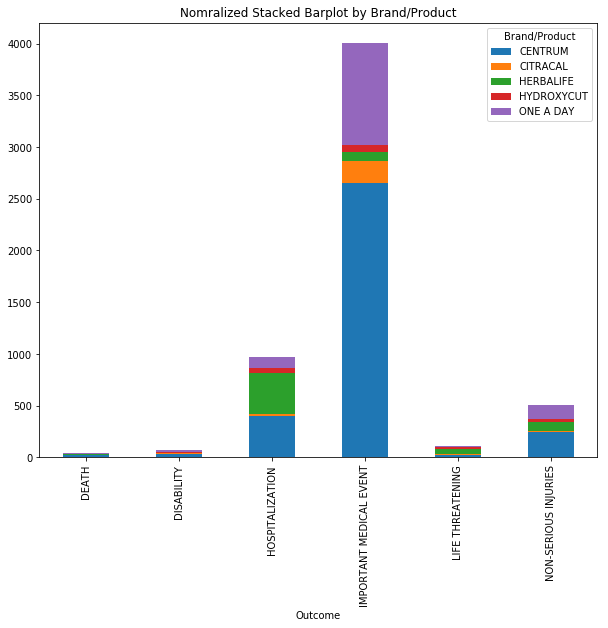

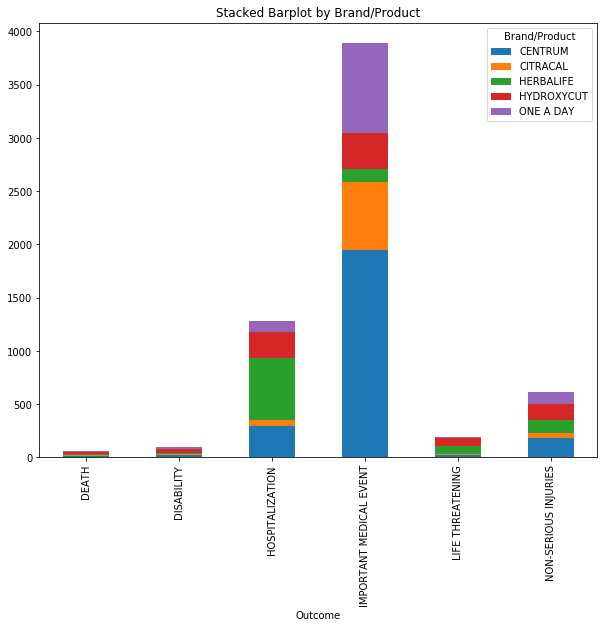

In [23]:
zzx=round(dfprod1/np.sum(dfprod1)*ddd2,0)
zzx.plot(kind="bar", stacked=True, figsize=(10,8))
plt.title("Nomralized Stacked Barplot by Brand/Product")
dfprod1.plot(kind="bar", stacked=True, figsize=(10,8))
plt.title("Stacked Barplot by Brand/Product")

In [24]:
dfdd=df.groupby(["Year", "Brand/Product"])["Outcome"].value_counts()
dfdd[2004]["BENEFIBER"]

Outcome
DEATH                   1
HOSPITALIZATION         1
LIFE THREATENING        1
NON-SERIOUS INJURIES    1
Name: Outcome, dtype: int64

In [25]:
ddd3=np.exp(ddd)

ddd3 = ddd3.sort_index()
ddd3=ddd3[3:]
a=["CENTRUM","CITRACAL","HERBALIFE","HYDROXYCUT","ONE A DAY"]
ddd3
ddd3.loc[2008]=[1,1,1,1,1]
for x in a:
    for t in range(2009,2017):
        ddd3[x][t]=ddd3[x][t-1]*ddd3[x][t]
ddd3=ddd3*35
ddd3

Brand/Product,CENTRUM,CITRACAL,HERBALIFE,HYDROXYCUT,ONE A DAY
Year,,,,,
2008,35.000000,35.0,35.000000,35.000000,35.000000
2009,27.450980,37.8,81.465517,407.647059,19.021739
2010,64.509804,72.8,65.775862,123.529412,21.050725
2011,247.058824,120.4,74.224138,529.117647,18.768116
2012,356.176471,165.2,68.189655,452.941176,29.673913
2013,353.431373,144.2,42.844828,37.058824,57.572464
2014,255.294118,137.2,61.551724,51.470588,33.224638
2015,179.803922,148.4,46.465517,51.470588,30.181159
2016,139.313725,135.8,33.793103,41.176471,26.123188


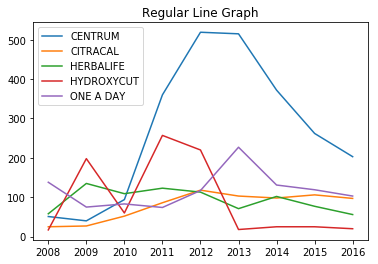

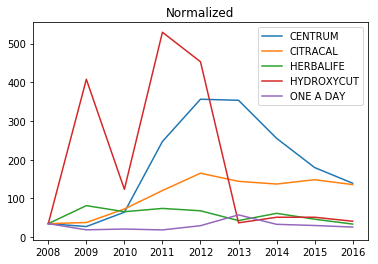

In [26]:
plt.plot(df2221[4:-1])
plt.legend(df2221.columns,loc="best")
plt.title("Regular Line Graph")
plt.show()
plt.plot(ddd3)
plt.legend(ddd3.columns,loc="best")
plt.title("Normalized")
plt.show()